In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import linregress

In [103]:
# Load the dataset
data = pd.read_csv('Country_health_trends.csv')

# Data Cleaning
# Convert Population column to numeric
data['Population'] = data['Population'].str.replace(',', '').astype(int)

# Remove any leading/trailing whitespaces in columns
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Display cleaned data
print("Cleaned Data Table:")
print(data.head())

Cleaned Data Table:
               Country  LifeExpectancy  FertilityRate  Population  \
0          Afghanistan            51.0           7.81    19701940   
1              Albania            74.2           2.47     3121965   
2              Algeria            73.2           2.63    31183658   
3               Angola            52.6           6.88    15058638   
4  Antigua and Barbuda            73.9           2.32       77648   

                       Region  
0                  South Asia  
1       Europe & Central Asia  
2  Middle East & North Africa  
3          Sub-Saharan Africa  
4                     America  


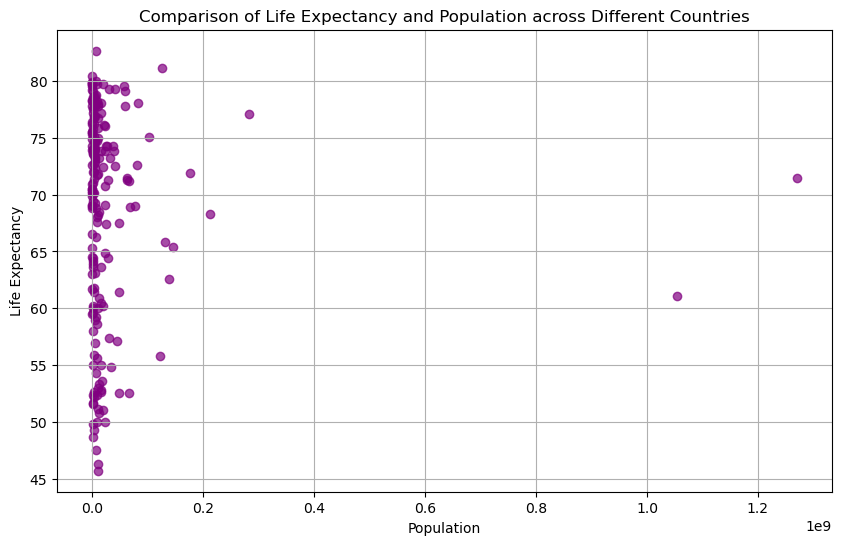

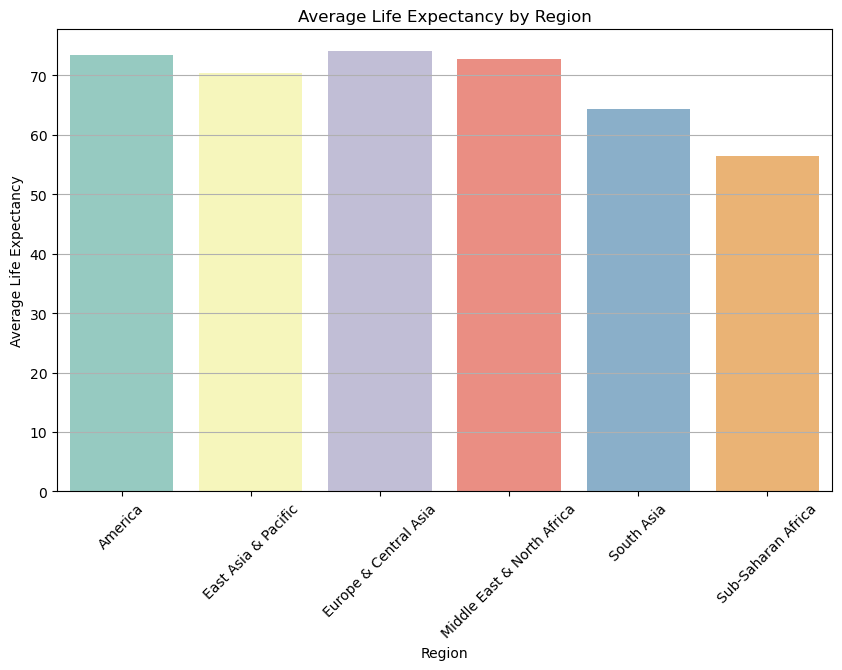

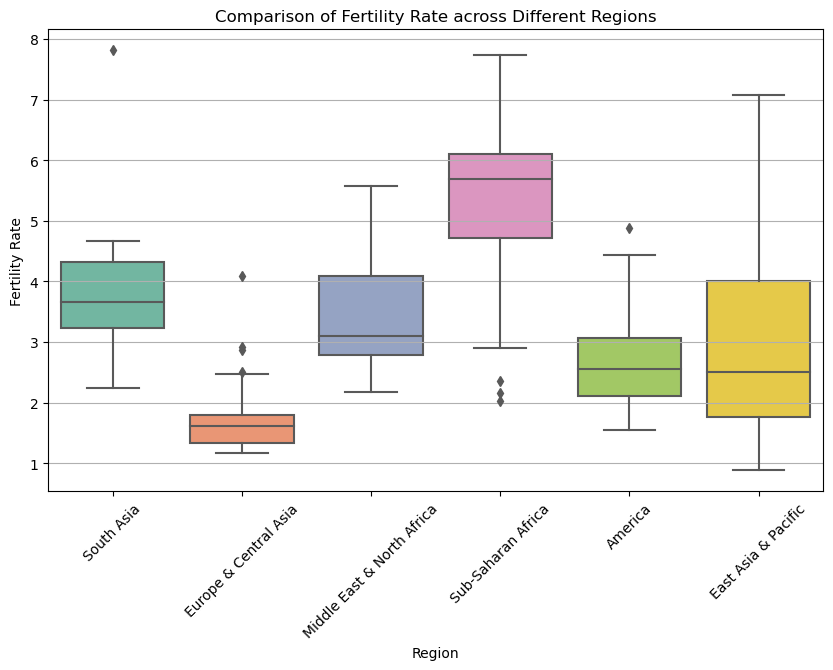

In [104]:
# Relational Graph Quality and Function
def relational_graph(data):
    """
    This function generates a relational graph comparing Life Expectancy and Population across different countries.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Population'], data['LifeExpectancy'], color='purple', alpha=0.7)
    plt.xlabel('Population')
    plt.ylabel('Life Expectancy')
    plt.title('Comparison of Life Expectancy and Population across Different Countries')
    plt.grid(True)
    plt.show()

# Demonstrate the function
relational_graph(data)

# Categorical Graph Quality and Function
def categorical_graph(data):
    """
    This function generates a categorical graph comparing Average Life Expectancy by Region.
    """
    plt.figure(figsize=(10, 6))
    region_life_expectancy = data.groupby('Region')['LifeExpectancy'].mean().reset_index()
    sns.barplot(x='Region', y='LifeExpectancy', data=region_life_expectancy, palette='Set3')
    plt.xlabel('Region')
    plt.ylabel('Average Life Expectancy')
    plt.title('Average Life Expectancy by Region')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Demonstrate the function
categorical_graph(data)

# Statistical Graph Quality and Function
def statistical_graph(data):
    """
    This function generates a statistical graph comparing Fertility Rate across different regions.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Region', y='FertilityRate', data=data, palette='Set2')
    plt.xlabel('Region')
    plt.ylabel('Fertility Rate')
    plt.title('Comparison of Fertility Rate across Different Regions')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
    
# Demonstrate the function
statistical_graph(data)



Depth of Statistics:
       LifeExpectancy  FertilityRate
count      191.000000     191.000000
mean        68.427293       3.297906
std          9.369538       1.763855
min         45.700000       0.880000
25%         61.400000       1.790000
50%         71.300000       2.800000
75%         75.850000       4.500000
max         82.663000       7.810000

Skewness:
LifeExpectancy   -0.698645
FertilityRate     0.740720
dtype: float64

Kurtosis:
LifeExpectancy   -0.671972
FertilityRate    -0.498739
dtype: float64


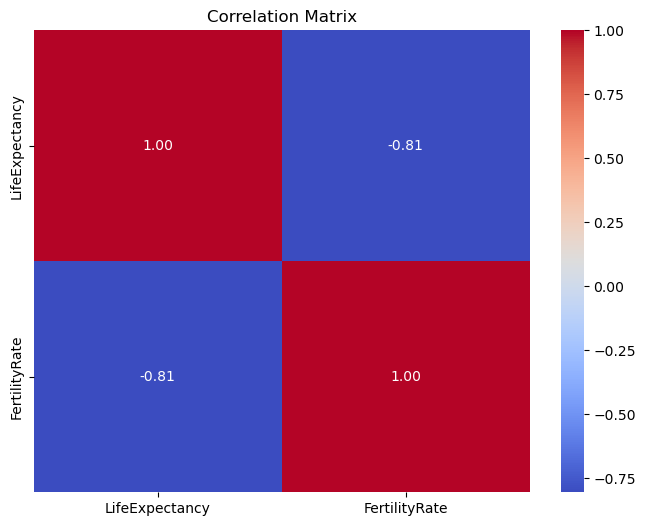

In [105]:
import seaborn as sns

# Depth of Statistics Function
def depth_of_statistics(data):
    """
    This function provides the depth of statistics including mean, median, standard deviation, skewness, and kurtosis.
    """
    stats = data[['LifeExpectancy', 'FertilityRate']].describe()
    print("Depth of Statistics:")
    print(stats)

    skewness = data[['LifeExpectancy', 'FertilityRate']].skew()
    print("\nSkewness:")
    print(skewness)

    kurtosis = data[['LifeExpectancy', 'FertilityRate']].kurtosis()
    print("\nKurtosis:")
    print(kurtosis)
    
# Demonstrate each function
depth_of_statistics(data)

# Correlation Matrix Function
def correlation_matrix(data):
    """
    This function generates a correlation matrix.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(data[['LifeExpectancy', 'FertilityRate']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()
    
# Demonstrate each function
correlation_matrix(data)

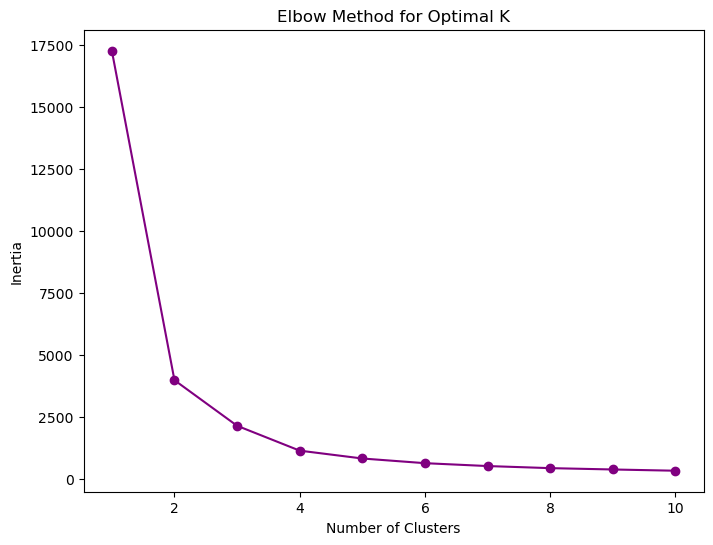

               Country  LifeExpectancy  FertilityRate  Population  \
0          Afghanistan            51.0           7.81    19701940   
1              Albania            74.2           2.47     3121965   
2              Algeria            73.2           2.63    31183658   
3               Angola            52.6           6.88    15058638   
4  Antigua and Barbuda            73.9           2.32       77648   

                       Region  Cluster  
0                  South Asia        0  
1       Europe & Central Asia        1  
2  Middle East & North Africa        1  
3          Sub-Saharan Africa        0  
4                     America        1  


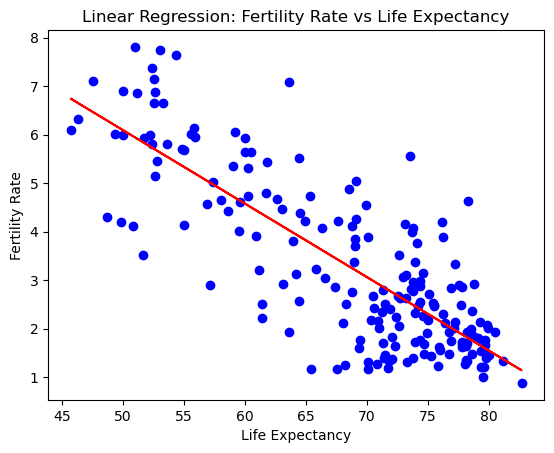

In [106]:
# Suppress the memory leak warning
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

# Set the environment variable to avoid memory leak
os.environ['OMP_NUM_THREADS'] = '1'

# Function for Elbow Plot
def elbow_plot(data):
    """
    This function generates an elbow plot to find the optimal number of clusters for k-means clustering.
    """
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data[['LifeExpectancy', 'FertilityRate']])
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), inertia, marker='o', color='purple')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K')
    plt.show()

# Function for K-Means Clustering
def kmeans_clustering(data, n_clusters):
    """
    This function performs k-means clustering on the data.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data[['LifeExpectancy', 'FertilityRate']])
    return data

# Function for Line Fitting
def line_fitting(data):
    """
    This function performs linear regression to fit a line to the data.
    """
    slope, intercept, _, _, _ = linregress(data['LifeExpectancy'], data['FertilityRate'])
    x = data['LifeExpectancy']
    plt.plot(x, slope*x + intercept, color='red')
    plt.scatter(data['LifeExpectancy'], data['FertilityRate'], color='blue')
    plt.xlabel('Life Expectancy')
    plt.ylabel('Fertility Rate')
    plt.title('Linear Regression: Fertility Rate vs Life Expectancy')
    plt.show()

# Demonstrate each function
elbow_plot(data)

# Perform K-Means Clustering with 3 clusters
data_clustered = kmeans_clustering(data, n_clusters=3)
print(data_clustered.head())

# Perform Line Fitting
line_fitting(data)